# Importing the required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

# Data Preprocessing

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().values.any()

False

# Checking the frequency of frauds before moving forward

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

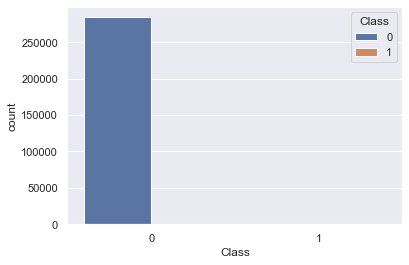

In [10]:
sns.countplot(x=df.Class, hue=df.Class)

By looking at the above statistics, we can see that the data is highly imbalanced. Only 492 out of 284807 are fraud

# Checking the distribution of amount

In [11]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

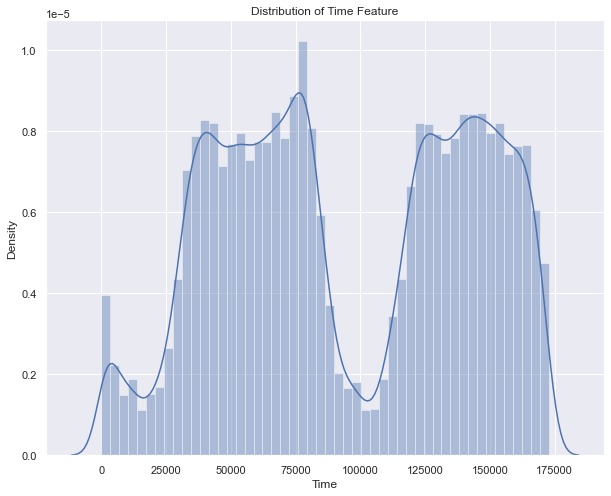

In [12]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

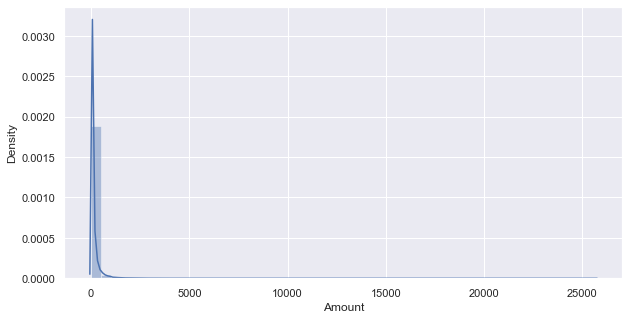

In [13]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

Since, it is a little difficult to see. Let's engineer a new feature of bins.

In [14]:
df['Amount-Bins'] = ''

In [15]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [16]:
bins, bin_labels = make_bins(df.Amount, size=10)

Now, adding bins in the column Amount-Bins.

In [17]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


Let's plot the bins.

In [18]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

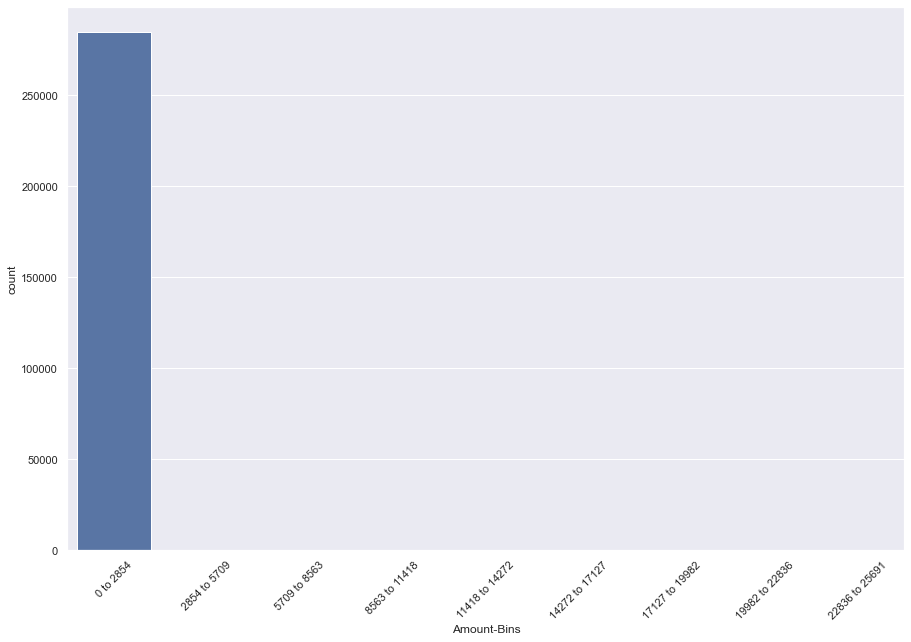

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

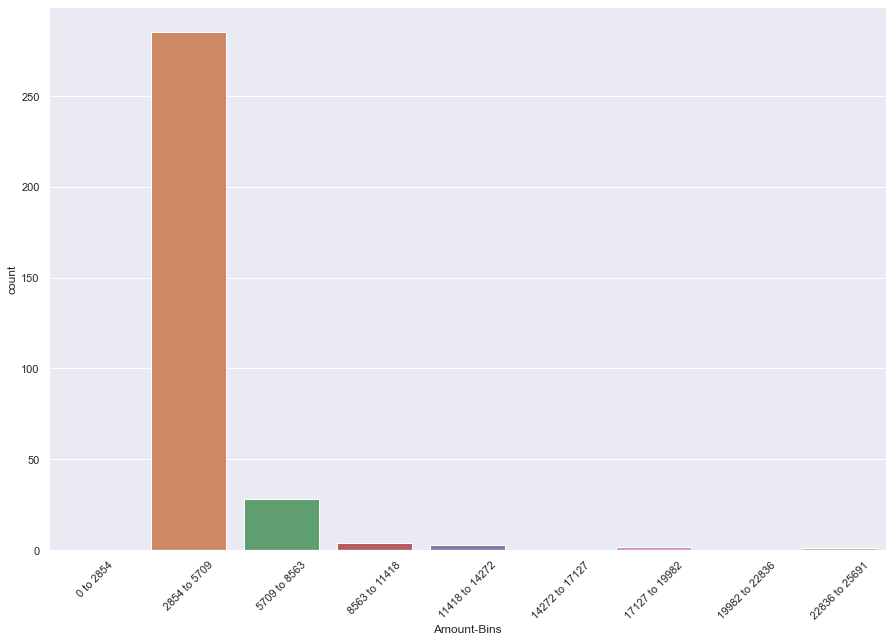

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

We can see that mostly the amount is between 0 and 2854 euros.

# One-hot encoding the Amount-Bins

Since, for classification, we need to pass the data in numerical form. That's why we need to One-Hot encode the Amount-Bins column.
Note: We can also label encode values.

In [21]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


# Random Undersampling

The present dataset is highly imbalanced with the fraud cases forming an extremely small percentage of the whole. This poses a problem in training the algorithms. To deal with this problem, the technique of random undersampling - removal of samples from majority class, is used.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

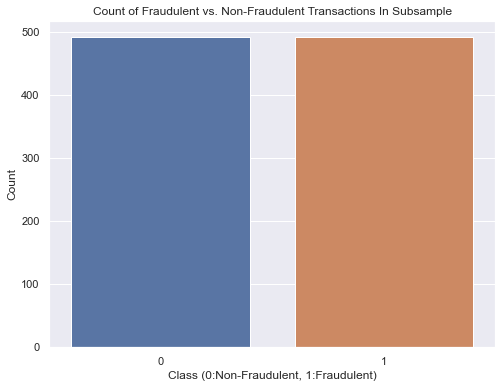

In [23]:
# undersampling with 1:1 ratio of legal and fraud transactions

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]



new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

# Outlier Detection and Removal

Here, features with high negative correlation and high positive correlation are identified. We then remove the outliers that lies outside 2.5 times the IQR in an attempt to eliminate the effect of outliers.



In [24]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [25]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.572558
V9,-0.555497
V10,-0.627718
V12,-0.678700
V14,-0.751542
V16,-0.595927
V17,-0.557277


In [26]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.717079
V11,0.690883
Class,1.000000


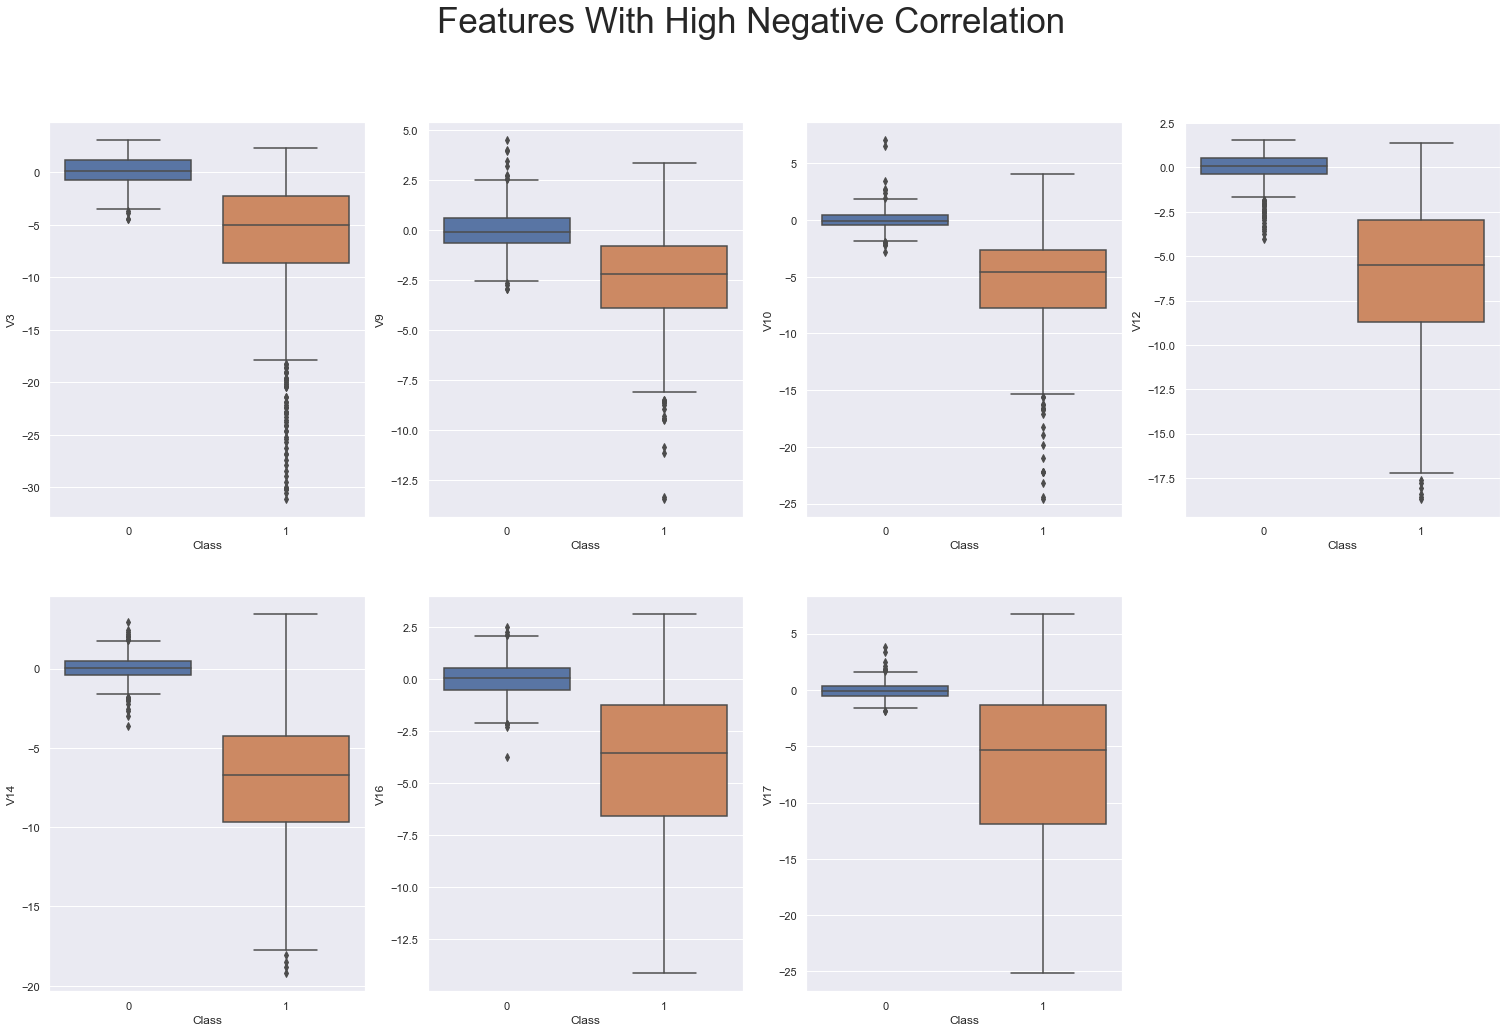

In [27]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

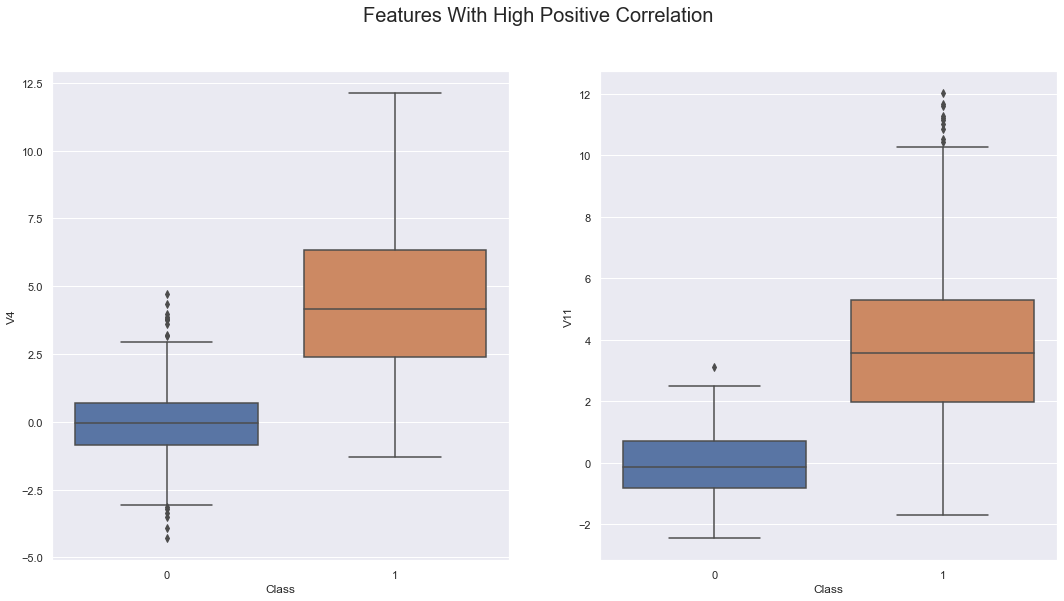

In [28]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1])

In [29]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [30]:
len_after = len(df2)
len_before = len(under_sample)
len_difference = len(under_sample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'
      .format(len_before, len_difference, len_after))

We reduced our data size from 984 transactions by 285 transactions to 699 transactions.


In [31]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Splitting the data to evaluate performance


Splitting the data to evaluate performance
After removing extreme outliers, the dataset is now split into training set and testing set for further processes.

In [32]:
X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Predictive Modelling 

Let's predict whether a credit card is fraud or not using machine learning

In [33]:
non_fraud = len(df[df.Class== 0])
fraud = len(df[df.Class ==1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of genuine transactions: " ,non_fraud)
print("Number of fraud transactions: ",fraud)
print("percentage of fraud transactions: {:.4f}".format(fraud_percent))

Number of genuine transactions:  284315
Number of fraud transactions:  492
percentage of fraud transactions: 0.1727


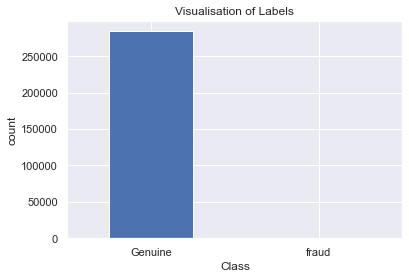

In [34]:
labels = ["Genuine" , "fraud"]
count_classes = df.value_counts(df['Class'], sort=True)
count_classes.plot(kind = "bar" , rot = 0)
plt.title("Visualisation of Labels")
plt.ylabel("count")
plt.xticks(range(2), labels)
plt.show()

# Breaking the dataset into training and testing

First, separating the response variable from the explanatory variables.

In [35]:
Y = df["Class"]
X = df.drop(["Class"],axis= 1)

X.shape, Y.shape

((284807, 39), (284807,))

In [36]:
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [37]:
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df.drop(['Amount','Time'], inplace = True,axis =1)

In [38]:
Y = df["Class"]
X = df.drop(["Class"],axis= 1)

In [39]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y,test_size= 0.3,random_state = 42)

print("shape of train_X: ",train_X.shape)
print("shape of test_X: ", test_X.shape)

shape of train_X:  (199364, 38)
shape of test_X:  (85443, 38)


# Applying Machine Learning Algorithms

# #RANDOM FOREST

In [40]:
## RANDOM FOREST
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) *100

# #DECISION TREE

In [41]:
## DECISION TREE CLASSIFIER
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X , test_Y)* 100

In [42]:
## PRINT SCORE OF OUR CLASSIFIERS

print("Random forest score: ", random_forest_score)
print("Decision Tree score: ", decision_tree_score)

Random forest score:  99.96137776061234
Decision Tree score:  99.91807403766254


In [43]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [44]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85266    41]
 [   29   107]]


In [45]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99918
Precision: 0.72297
Recall: 0.78676
F1-score: 0.75352


In [46]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest
[[85302     5]
 [   28   108]]


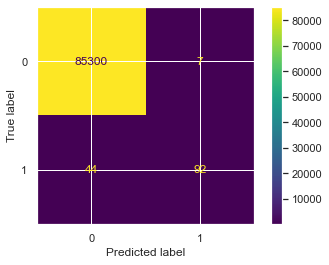

In [47]:
clf = SVC(random_state=0)
clf.fit(train_X, train_Y)
SVC(random_state=0)
predictions = clf.predict(test_X)
cm = confusion_matrix(test_Y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

In [48]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99961
Precision: 0.95575
Recall: 0.79412
F1-score: 0.86747


In [49]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [50]:
print("Evaluation of Random Forest Model")
print()

metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99964
Precision: 0.94118
Recall: 0.82353
F1-score: 0.87843


## Classification Algorithms

Parameter Tuning
Three algorithms - Logistic Regression, Support Vector Machine and Random Forest are used to solve the problem. A comparative study is then followed by evaluating each algorithm with respect to selected performance metrics. Simple logistic regression is used. For the parameters of Support Vector Machine and Random Forest, Grid Search technique is employed to tune the parameters.

In [52]:
#importing relevant packages

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

# Random Undersampling


The present dataset is highly imbalanced with the fraud cases forming an extremely small percentage of the whole. This poses a problem in training the algorithms. To deal with this problem, the technique of random undersampling - removal of samples from majority class, is used.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

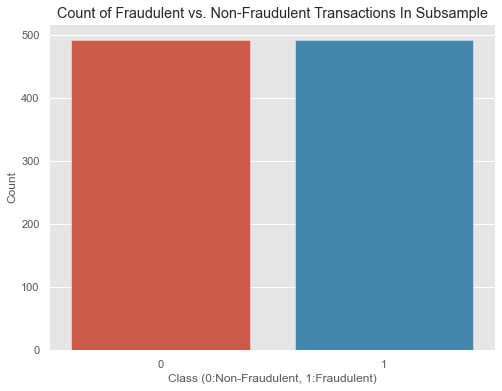

In [66]:
# undersampling with 1:1 ratio of legal and fraud transactions

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]



new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

## Outlier Detection and Removal


Here, features with high negative correlation and high positive correlation are identified. We then remove the outliers that lies outside 2.5 times the IQR in an attempt to eliminate the effect of outliers.

In [67]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [68]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.562617
V9,-0.570312
V10,-0.624413
V12,-0.686350
V14,-0.749558
V16,-0.592493
V17,-0.557670


In [69]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.709630
V11,0.684362
Class,1.000000


In [72]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]


In [73]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Splitting the data to evaluate performance

In [74]:
X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [75]:
# paramter tuning for Support Vector Machine

def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_svm = svc_param_selection(X_under_train,y_under_train)

print(best_params_svm)

{'C': 10, 'gamma': 0.01}


In [76]:
# parameter tuning for Random Forest

def rf_param_selection(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = rf_param_selection(X_under_train,y_under_train)

print(best_params)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


## Evaluating Algorithms

The evaluation and comparison of algorithms is performed using K-fold cross validation. F1 score and ROC-AUC are used as performance metrics. The mean of each parameter across the k sets is displayed.

In [77]:
# comparison of the three algorithms


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9399759199437376
ROC-AUC: 0.9712676218235321


Support Vector Machine:

F1 Score: 0.9478410142048638
ROC-AUC: 0.9671156783822283


Random Forest:

F1 Score: 0.9439331044974191
ROC-AUC: 0.9759713033469545




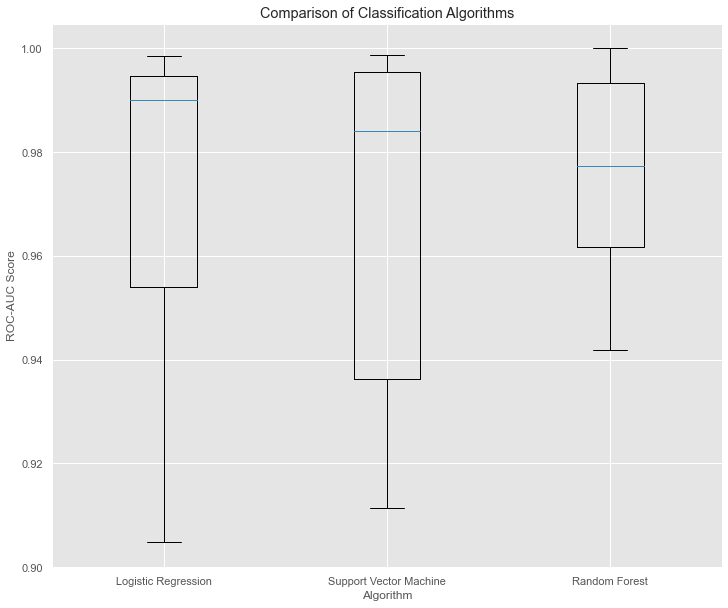

In [78]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

# Comparison of various algorithms

In [79]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [80]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9399759199437376
ROC-AUC: 0.9712676218235321


Support Vector Machine:

F1 Score: 0.9478410142048638
ROC-AUC: 0.9671156783822283


Random Forest:

F1 Score: 0.9439331044974191
ROC-AUC: 0.9765149139623741




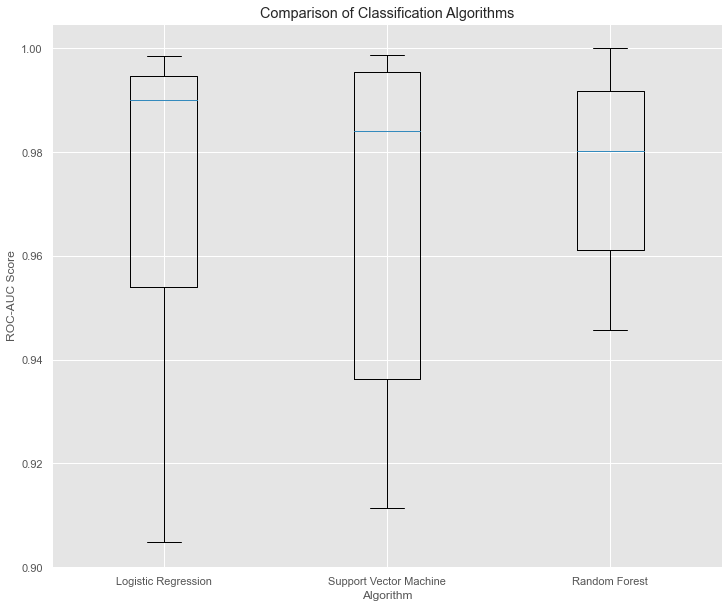

In [81]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## 15% SAMPLING RATIO

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

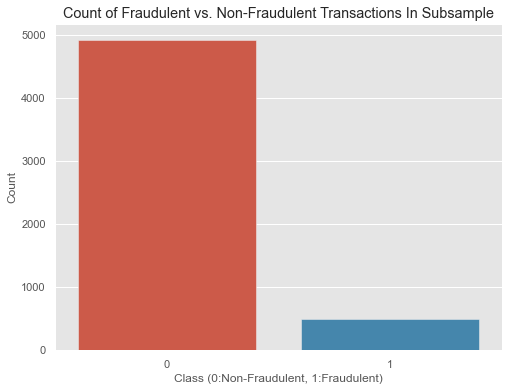

In [82]:
# 15% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [83]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [84]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9457456127028261
ROC-AUC: 0.9812901227148764


Support Vector Machine:

F1 Score: 0.952841031027603
ROC-AUC: 0.9709387395718816


Random Forest:

F1 Score: 0.9481236246382565
ROC-AUC: 0.9768219006514668




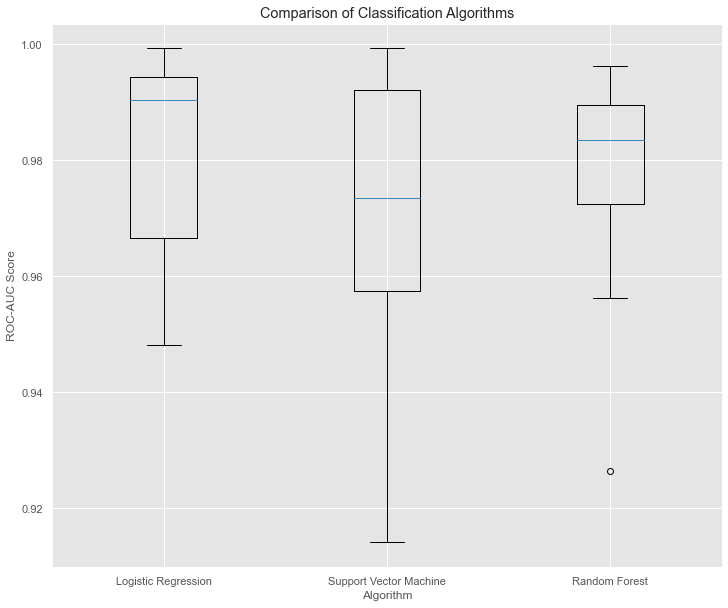

In [85]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

# 5% UNDERSAMPLING RATIO

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

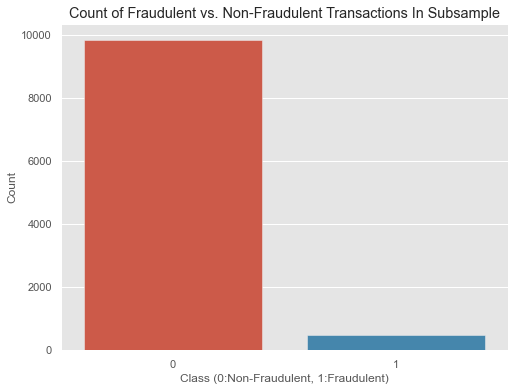

In [86]:
# 5% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.05), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [88]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


In [89]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9406640510447607
ROC-AUC: 0.9731323075579045


Support Vector Machine:

F1 Score: 0.9409963357087398
ROC-AUC: 0.9414785206902632


Random Forest:

F1 Score: 0.9345736711688557
ROC-AUC: 0.9577236766689786




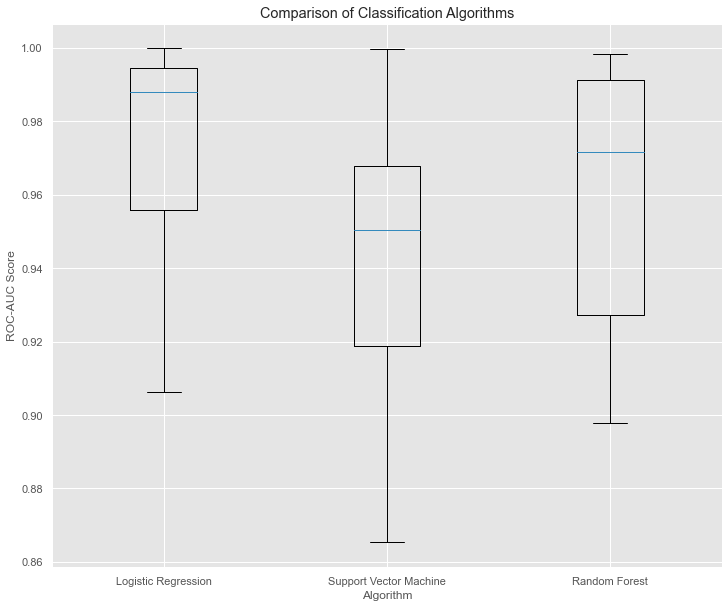

In [90]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

# Conclusion

As we can observe above, as the ratio of fraud cases decreases the ROC-AUC and F1 score of Logistic Regression and Support Vector Machine show a downward trend whereas those of Random Forest show better performance. The F-score of Random Forest is better than the other two with decreasing ratio of fraud cases. This is an important performance indicator as it shows that the system is correctly classifying frauds as well as minimising errors in incorrect classification, both of which are extremely relevant to the real world scenario. The performance of Random Forest can be further explored if the features are not anonymised and with further tuning of the hyperparameters. The tuning here is done by Grid Search whereas in further study, tuning can be improved by using Random Search followed by Grid Search to obtain better hyperparameters.